In [3]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense


Встановлюємо гіперпараметри:



In [4]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32


Завантаження даних:

In [5]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Передпроцесинг послідовних даних:

In [6]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів


Побудова простої моделі RNN:

In [7]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання SimpleRNN шару з 32 вузлами
model.add(SimpleRNN(32))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)


Компіляція моделі:

In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


Виведення опису моделі:

In [ ]:
model.summary()


Навчання моделі:

In [9]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини


Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - acc: 0.5264 - loss: 0.6898 - val_acc: 0.4969 - val_loss: 0.8176
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 109ms/step - acc: 0.7142 - loss: 0.5668 - val_acc: 0.8272 - val_loss: 0.4048
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - acc: 0.8472 - loss: 0.3605 - val_acc: 0.7831 - val_loss: 0.4703
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - acc: 0.8903 - loss: 0.2788 - val_acc: 0.8441 - val_loss: 0.3935
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - acc: 0.9203 - loss: 0.2112 - val_acc: 0.7995 - val_loss: 0.4667


Відображення результатів:

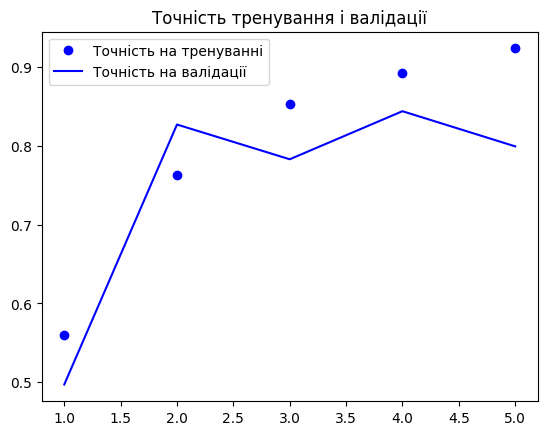

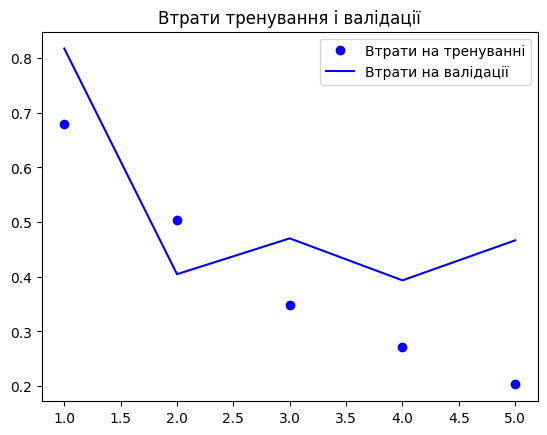

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки


Прогнозування з використанням навченої моделі:

In [11]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))


782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - acc: 0.7994 - loss: 0.4631
Test Loss: 0.4578014016151428
Test Accuracy: 0.8017200231552124
